In [13]:
# import fsps
from matplotlib import pylab as plt
import numpy as np
from scipy.interpolate import interp1d
np.set_printoptions(threshold=np.nan)
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from math import *
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord,Angle
from astropy.cosmology import FlatLambdaCDM



sed1 = np.loadtxt("wave_spec.txt")
sed2 = np.loadtxt("kindoffinalsed.txt")
filtertranf435w = np.loadtxt("filter_wfc_acs_f435w.txt")
filtertranf606w = np.loadtxt("filter_wfc_acs_f606w.txt")
filtertranf775w = np.loadtxt("filter_wfc_acs_f775w.txt")
filtertranf850lp = np.loadtxt("filter_wfc_acs_f850lp.txt")
filtertranf105w = np.loadtxt("filter_wfc3_ir_f105w.txt")
filtertranf125w = np.loadtxt("filter_wfc3_ir_f125w.txt")
filtertranf160w = np.loadtxt("filter_wfc3_ir_f160w.txt")
filtertranf200w = np.loadtxt("filter_jwst_f200w.txt")
filtertranf277w = np.loadtxt("filter_jwst_f277w.txt")
filtertranf356w = np.loadtxt("filter_jwst_f356w.txt")
filtertranf444w = np.loadtxt("filter_jwst_f444w.txt")
filenamewave = []
filenamewave.append(filtertranf606w[:,0])
filenamewave.append(filtertranf435w[:,0])
filenamewave.append(filtertranf850lp[:,0])
filenamewave.append(filtertranf775w[:,0])
filenamewave.append(filtertranf105w[:,0])
filenamewave.append(filtertranf160w[:,0])
filenamewave.append(filtertranf125w[:,0])
filenamewave.append(filtertranf200w[:,0])

filenameflux = []
filenameflux.append(filtertranf606w[:,0])
filenameflux.append(filtertranf435w[:,0])
filenameflux.append(filtertranf850lp[:,0])
filenameflux.append(filtertranf775w[:,0])
filenameflux.append(filtertranf105w[:,0])
filenameflux.append(filtertranf160w[:,0])
filenameflux.append(filtertranf125w[:,0])
filenameflux.append(filtertranf200w[:,0])

list_names = ['wfc_acs_f435w','wfc_acs_f606w','wfc_acs_f775w','wfc_acs_f850lp','wfc3_ir_f105w','wfc3_ir_f125w',
             'wfc3_ir_f160w','jwst_f200w']
print (filenamewave[5])

#,filtertranf775w,filtertranf850lp,filtertranf105w,filtertranf160w,
                #filtertranf200w,filtertranf277w,filtertranf356w,filtertranf444w
#print(filenamewave)

wavecut = sed1[:,0]
sedcut = sed1[:,1]
wave2 = sed2[:,0]
sedfinal = 4*sed2[:,1]
#sedcut.astype(float)
#mean = np.mean(sedcut)
#print (mean)
#print (type(wavecut))
print (type(wavecut))

[  8000.   8001.   8002.   8003.   8004.   8005.   8006.   8007.   8008.
   8009.   8010.   8011.   8012.   8013.   8014.   8015.   8016.   8017.
   8018.   8019.   8020.   8021.   8022.   8023.   8024.   8025.   8026.
   8027.   8028.   8029.   8030.   8031.   8032.   8033.   8034.   8035.
   8036.   8037.   8038.   8039.   8040.   8041.   8042.   8043.   8044.
   8045.   8046.   8047.   8048.   8049.   8050.   8051.   8052.   8053.
   8054.   8055.   8056.   8057.   8058.   8059.   8060.   8061.   8062.
   8063.   8064.   8065.   8066.   8067.   8068.   8069.   8070.   8071.
   8072.   8073.   8074.   8075.   8076.   8077.   8078.   8079.   8080.
   8081.   8082.   8083.   8084.   8085.   8086.   8087.   8088.   8089.
   8090.   8091.   8092.   8093.   8094.   8095.   8096.   8097.   8098.
   8099.   8100.   8101.   8102.   8103.   8104.   8105.   8106.   8107.
   8108.   8109.   8110.   8111.   8112.   8113.   8114.   8115.   8116.
   8117.   8118.   8119.   8120.   8121.   8122.   

8
[26.109926523300089] [25.51632061472294]
[26.109926523300089, 26.110214344724628] [25.51632061472294, 25.516354718726962]
[26.109926523300089, 26.110214344724628, 25.854263396029047] [25.51632061472294, 25.516354718726962, 25.4702008350956]
[26.109926523300089, 26.110214344724628, 25.854263396029047, 25.8609167244521] [25.51632061472294, 25.516354718726962, 25.4702008350956, 25.480555750507996]
[26.109926523300089, 26.110214344724628, 25.854263396029047, 25.8609167244521, 25.62818710835765] [25.51632061472294, 25.516354718726962, 25.4702008350956, 25.480555750507996, 25.258723191948846]
[26.109926523300089, 26.110214344724628, 25.854263396029047, 25.8609167244521, 25.62818710835765, 25.62818710835765] [25.51632061472294, 25.516354718726962, 25.4702008350956, 25.480555750507996, 25.258723191948846, 25.258723191948846]
[26.109926523300089, 26.110214344724628, 25.854263396029047, 25.8609167244521, 25.62818710835765, 25.62818710835765, 25.628174754908379] [25.51632061472294, 25.516354718

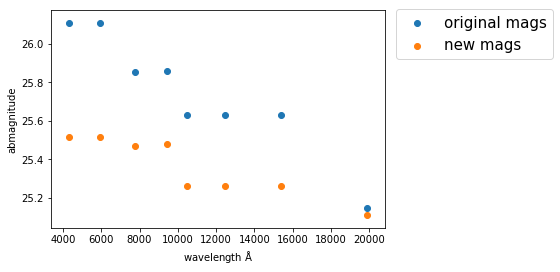

In [24]:
class lambdafunc(object):
    def update(self,wavelength,value,units):
        if not len(wavelength)==len(value):
            raise ValueError('The length of wavelength list does not equal to the length of value list')
        else:
            self.wavelength=np.array(wavelength)*float(1*units[0].cgs/u.Angstrom)
            self.value=np.array(value)
            self.units=[u.Angstrom.cgs,units[1].cgs]
            self.interval=(np.append(self.wavelength,0)-np.append(0,self.wavelength))[1:-1]
            self.midvalue=(np.append(self.value,0)+np.append(0,self.value))[1:-1]/2.0



    def getvalue(self,x):
        return np.interp(x,self.wavelength,self.value)

    def plot(self):
        plt.plot(self.wavelength,self.value)
        plt.xlabel('Wavelength / $\AA$',fontsize=16)
        plt.ylabel('Arbitrary Unit',fontsize=16)
        plt.show()


class FiltCurve(lambdafunc):
    def __init__(self,wavelength,value,units=[u.Angstrom,u.Quantity(1)]):
        self.update(wavelength,value,units)


class Spectrum(lambdafunc):
    def __init__(self,wavelength,value,units=[u.Angstrom,u.erg/u.s/u.cm/u.cm/u.Angstrom],mode='OBS'):
        self.update(wavelength,value,units)
        self.mode=mode

    def flux(self,filt):
        newflux=self.getvalue(np.array(filt.wavelength*filt.units[0]/self.units[0]))
        filtered_flux=newflux*filt.value


        midflux=(np.append(filtered_flux,0)+np.append(0,filtered_flux))[1:-1]/2.0
        interval=np.abs(filt.interval)

        return np.sum(interval*midflux)*filt.units[0]*self.units[1]

    def magnitude(self,filt,style='AB'):
        '''
        Calculate the magnitude in the input filter.
        '''
        ### Now, AB mag only ###

        objflux=self.flux(filt)
        stdspec=((3631*u.Jy).cgs*3e10*u.cm/u.s/((filt.wavelength*filt.units[0]).cgs)**2).to(self.units[1])

        midstdspec=(np.append(stdspec,0)+np.append(0,stdspec))[1:-1]/2.0

        interval=np.abs(filt.interval)
        stdflux=np.sum(interval*midstdspec*filt.midvalue)*filt.units[0]*self.units[1]

        mag=-2.5*np.log10(float(objflux/stdflux))
        return mag

    

        self.mode='ABS'

   

    def normalize(self,filt,mag,style='AB'):
        mag0=self.magnitude(filt,style)
        scale=10**(0.4*(mag0-mag))

        self.value=self.value*scale

def main():
    '''
    An example.
    '''

    '''
    Always follow:

    Wavelength in angtrom.
    Flux in erg s-1 cm-2 A-1
    '''
    magnitude = []
    magnitude2 = []
    print (len(filenamewave))
    for i in range(0,len(filenamewave)):
        
    #input the filter
        Filter = FiltCurve(filenamewave[i],filenameflux[i])
  
    #input the final spec and observed wavelength in angstroms
        spec = Spectrum(wavecut, sedcut)
        spec2 = Spectrum(wave2, sedfinal)
        magnitude.append(spec.magnitude(Filter))
        magnitude2.append(spec2.magnitude(Filter))
        print(magnitude,magnitude2)
       
    centralwave = [4297,5907,7764,9445, 10500, 12486, 15369, 19890]
#     print (filenamewave)
    plt.ylabel('abmagnitude')
    plt.xlabel(r'wavelength $\rm{\AA}$')
    plt.scatter(centralwave, magnitude,label='original mags')
    plt.scatter(centralwave, magnitude2,label='new mags')
    plt.legend(bbox_to_anchor=(1.01, 1.04),loc=2,fontsize=15)
    plt.show()
if __name__=='__main__':
    main()